# Using LittleVGG for Emotion Detection

- https://drive.google.com/open?id=1bcmF3t9fhfRaQUS_xpqifBSfbmglKZuT

## Locate the Training Data

In [1]:
ls ..\..\FERPlus

 Volume in drive C has no label.
 Volume Serial Number is F83E-D764

 Directory of C:\Users\jay31\OneDrive\Documents\College\CSCE 4201 Artificial Intelligence\Project\FERPlus

05/03/2020  01:46 PM    <DIR>          .
05/03/2020  01:46 PM    <DIR>          ..
05/02/2020  10:13 PM    <DIR>          data
03/10/2020  03:30 PM           108,408 FER+vsFER.png
07/10/2013  02:19 PM       301,072,766 fer2013.csv
05/03/2020  01:27 PM         1,638,650 fer2013new.csv
03/10/2020  03:30 PM             1,114 LICENSE.md
03/10/2020  03:30 PM             4,430 README.md
05/02/2020  10:14 PM    <DIR>          src
               5 File(s)    302,825,368 bytes
               4 Dir(s)  90,663,419,904 bytes free


In [2]:
import pandas as pd
data = pd.read_csv('..\..\FERPlus\\fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


## Training

In [3]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import numpy as np
import os

Using TensorFlow backend.


In [4]:
num_classes = 7
img_rows, img_cols = 48, 48

emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))

train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 
X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
Y_test = test_set.emotion 
y_test = np_utils.to_categorical(Y_test, num_classes) 

print("Training Instances: ", num_train)
print("Validation Instances: ", num_val)
print("Test Instances: ", num_test)

Training Instances:  28709
Validation Instances:  3589
Test Instances:  3589


In [6]:
datagen = ImageDataGenerator( 
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')

testgen = ImageDataGenerator( 
    rescale=1./255
    )
datagen.fit(X_train)
batch_size = 64

In [7]:
train_flow = datagen.flow(X_train, y_train, batch_size=batch_size) 
val_flow = testgen.flow(X_val, y_val, batch_size=batch_size) 
test_flow = testgen.flow(X_test, y_test, batch_size=batch_size)

## Keras

In [8]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

## Model

In [9]:
model = Sequential()

#Convolution block 1
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding = "same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#Convolution block 2
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#Convolution block 3
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#Convolution block 4
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

#Convolution block 5
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)       

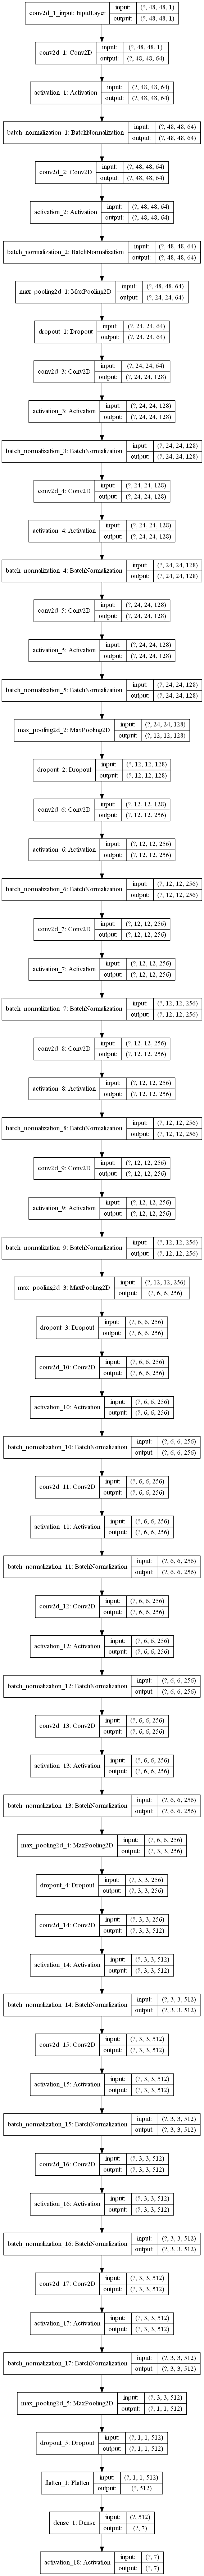

In [10]:
import tensorflow as tf

tf.keras.utils.plot_model(model, show_shapes=True)

## Training

In [11]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("..\Models\emotion_little_vgg_4.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr=0.001, decay=1e-6),
              metrics = ['accuracy'])

epochs = 200

#    
#    
history = model.fit_generator(
    train_flow,
    epochs = epochs,
    callbacks = callbacks,
    steps_per_epoch = num_train // batch_size,
    validation_data = val_flow,
    validation_steps = num_val // batch_size)

Epoch 1/200
448/448 [==============================] - 51s 115ms/step - loss: 2.2835 - accuracy: 0.2334 - val_loss: 1.9106 - val_accuracy: 0.2419

Epoch 00001: val_loss improved from inf to 1.91057, saving model to ..\Models\emotion_little_vgg_4.h5
Epoch 2/200
448/448 [==============================] - 44s 99ms/step - loss: 1.8463 - accuracy: 0.3199 - val_loss: 1.6855 - val_accuracy: 0.3441

Epoch 00002: val_loss improved from 1.91057 to 1.68551, saving model to ..\Models\emotion_little_vgg_4.h5
Epoch 3/200
448/448 [==============================] - 44s 98ms/step - loss: 1.5990 - accuracy: 0.3956 - val_loss: 1.8215 - val_accuracy: 0.4122

Epoch 00003: val_loss did not improve from 1.68551
Epoch 4/200
448/448 [==============================] - 44s 99ms/step - loss: 1.3841 - accuracy: 0.4683 - val_loss: 1.0464 - val_accuracy: 0.4704

Epoch 00004: val_loss improved from 1.68551 to 1.04636, saving model to ..\Models\emotion_little_vgg_4.h5
Epoch 5/200
448/448 [=============================

448/448 [==============================] - 45s 99ms/step - loss: 0.7935 - accuracy: 0.7029 - val_loss: 0.6881 - val_accuracy: 0.6621

Epoch 00037: val_loss did not improve from 0.68048
Epoch 38/200
448/448 [==============================] - 45s 100ms/step - loss: 0.7868 - accuracy: 0.7061 - val_loss: 0.9929 - val_accuracy: 0.6565

Epoch 00038: val_loss did not improve from 0.68048

Epoch 00038: ReduceLROnPlateau reducing learning rate to 2.5600002118153498e-09.
Epoch 39/200
448/448 [==============================] - 44s 99ms/step - loss: 0.7873 - accuracy: 0.7072 - val_loss: 0.9071 - val_accuracy: 0.6559

Epoch 00039: val_loss did not improve from 0.68048
Epoch 40/200
448/448 [==============================] - 45s 100ms/step - loss: 0.7906 - accuracy: 0.7054 - val_loss: 0.9307 - val_accuracy: 0.6565

Epoch 00040: val_loss did not improve from 0.68048
Epoch 41/200
448/448 [==============================] - 46s 102ms/step - loss: 0.7914 - accuracy: 0.7061 - val_loss: 1.0672 - val_accurac

448/448 [==============================] - 43s 97ms/step - loss: 0.7931 - accuracy: 0.7027 - val_loss: 0.9301 - val_accuracy: 0.6513

Epoch 00073: val_loss did not improve from 0.54164

Epoch 00073: ReduceLROnPlateau reducing learning rate to 5.2428803630155353e-17.
Epoch 74/200
448/448 [==============================] - 43s 97ms/step - loss: 0.7989 - accuracy: 0.7029 - val_loss: 0.7669 - val_accuracy: 0.6618

Epoch 00074: val_loss did not improve from 0.54164
Epoch 75/200
448/448 [==============================] - 43s 96ms/step - loss: 0.7876 - accuracy: 0.7075 - val_loss: 0.9514 - val_accuracy: 0.6539

Epoch 00075: val_loss did not improve from 0.54164
Epoch 76/200
448/448 [==============================] - 43s 96ms/step - loss: 0.7880 - accuracy: 0.7047 - val_loss: 0.9937 - val_accuracy: 0.6539

Epoch 00076: val_loss did not improve from 0.54164

Epoch 00076: ReduceLROnPlateau reducing learning rate to 1.0485760990728867e-17.
Epoch 77/200
448/448 [==============================] - 4

### Loading saved model

In [15]:
from keras.models import load_model

classifier = load_model('..\Models\emotion_little_vgg_4.h5')

Confusion Matrix
[[ 78   7  48 116  74  57 111]
 [ 10   0   6   9   7  10  13]
 [ 80   5  47 124  86  75 111]
 [115  10  91 200 140  96 227]
 [ 80   2  50 152  84  73 153]
 [ 67   4  29 101  83  51  81]
 [ 85   7  70 148 109  68 139]]
Classification Report
              precision    recall  f1-score   support

       Angry       0.15      0.16      0.16       491
     Disgust       0.00      0.00      0.00        55
        Fear       0.14      0.09      0.11       528
       Happy       0.24      0.23      0.23       879
         Sad       0.14      0.14      0.14       594
    Surprise       0.12      0.12      0.12       416
     Neutral       0.17      0.22      0.19       626

    accuracy                           0.17      3589
   macro avg       0.14      0.14      0.14      3589
weighted avg       0.17      0.17      0.16      3589



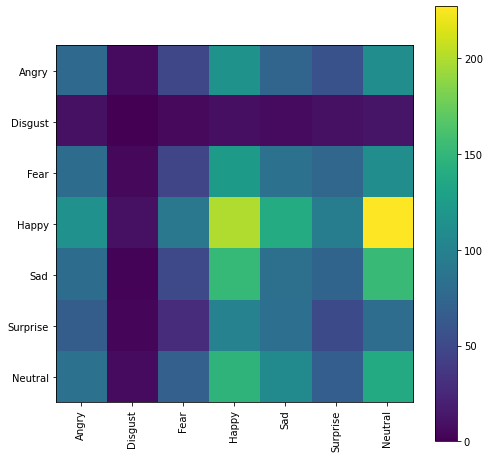

In [16]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = classifier.predict(test_flow)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(Y_test, y_pred))
print('Classification Report')
print(classification_report(Y_test, y_pred, target_names=emotion_labels))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(Y_test, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(emotion_labels))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

### Webcam

In [19]:
import cv2
import numpy as np
from time import sleep
from keras.preprocessing.image import img_to_array

face_classifier = cv2.CascadeClassifier('..\Models\Haarcascades\haarcascade_frontalface_default.xml')

def face_detector(img):
    # Convert image to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)
    if faces is ():
        return (0,0,0,0), np.zeros((48,48), np.uint8), img
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]

    try:
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
    except:
        return (x,w,y,h), np.zeros((48,48), np.uint8), img
    return (x,w,y,h), roi_gray, img

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    rect, face, image = face_detector(frame)
    if np.sum([face]) != 0.0:
        roi = face.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)

        # make a prediction on the ROI, then lookup the class
        preds = classifier.predict(roi)[0]
        label = emotion_labels[preds.argmax()]  
        label_position = (rect[0] + int((rect[1]/2)), rect[2] + 25)
        cv2.putText(image, label, label_position , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    else:
        cv2.putText(image, "No Face Found", (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
        
    cv2.imshow('All', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      

In [18]:
cap.release()
cv2.destroyAllWindows()      